In [1]:
%reset -f

import seaborn as sns
import scipy
import numpy
import glob
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, layers, callbacks
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
from IPython.core.pylabtools import figsize

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Set random seed for reproducibility
tf.random.set_seed(1234)

In [4]:

# assign path
path, dirs, files = next(os.walk("/Users/gershikoral/Desktop/labproject/featurescsv/True/"))
file_count = len(files)
# create empty list
dataframes_list = []
 
# append datasets to the list
for i in range(file_count):
    temp_df = pd.read_csv("/Users/gershikoral/Desktop/labproject/featurescsv/True/"+files[i])
    dataframes_list.append(temp_df)
     
# display datasets
for dataset in dataframes_list:
    display(dataset)

dataset.describe

,Unnamed: 0


,2.209253855773238989e-02,1.416793367362499147e-02,2.603239674051447849e+00,1.129893693516845904e-01,1.810849756789430776e-01,2.350843881334019891e-01,0.000000000000000000e+00,7.666666666666666075e-02,-2.362781422038779056e+01,1.696038607400744080e+00,...,2.603085973675258250e-03,4.863823555305007464e-03,9.296356679908430315e-03,5.753077723479797789e-02,1.376682099142325809e-03,5.887202903875504191e-03,9.088378098917455211e-03,8.193478035771107129e-03,1.004863837381584496e-02,1.926625277254986543e-02
0,0.024594,0.024881,2.656527,0.080182,0.139760,0.177964,0.003205,0.059167,-22.630546,2.130344,...,0.003013,0.010640,0.018819,0.049100,0.005483,0.014890,0.031725,0.009381,0.004531,0.012740
1,0.030013,0.044120,2.924355,0.065951,0.100926,0.136209,0.004305,0.039167,-21.965802,2.243569,...,0.009757,0.003911,0.032087,0.011813,0.003647,0.005450,0.045853,0.047987,0.004137,0.019900
2,0.030013,0.076938,3.187308,0.097300,0.169002,0.103833,0.002880,0.032500,-21.679744,2.127344,...,0.001728,0.002659,0.023788,0.008369,0.000418,0.004238,0.023083,0.066871,0.002491,0.032219
3,0.020425,0.082946,3.263119,0.085333,0.156783,0.045342,0.004376,0.030833,-22.541512,2.488397,...,0.004288,0.005413,0.031001,0.007334,0.000331,0.000263,0.010750,0.043972,0.002127,0.049192
4,0.014173,0.090350,3.283314,0.069294,0.139341,0.018084,0.006157,0.024167,-23.256388,3.043020,...,0.000485,0.002595,0.013683,0.004571,0.000315,0.000631,0.003065,0.034587,0.000410,0.058840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1991,0.012505,0.009931,3.092433,0.080821,0.152862,0.039908,0.004104,0.011667,-25.931033,3.061248,...,0.011592,0.019840,0.008199,0.133010,0.000451,0.001987,0.010161,0.066532,0.000128,0.037072
1992,0.007503,0.024129,2.872199,0.038394,0.085995,0.005322,0.009267,0.022500,-25.003059,4.165382,...,0.000931,0.007999,0.009970,0.033337,0.000090,0.000979,0.013515,0.082464,0.000979,0.030609
1993,0.010838,0.035752,3.101966,0.033988,0.064746,0.002907,0.006460,0.024167,-24.411535,3.705688,...,0.000743,0.005904,0.010703,0.010084,0.000899,0.000111,0.014433,0.114737,0.000778,0.035777
1994,0.012922,0.045108,3.261368,0.078435,0.165135,0.017848,0.005274,0.030000,-23.114287,2.929522,...,0.007209,0.010888,0.008286,0.027515,0.000467,0.000358,0.018238,0.132497,0.001312,0.034813


<bound method NDFrame.describe of       2.209253855773238989e-02  1.416793367362499147e-02  \
0                     0.024594                  0.024881   
1                     0.030013                  0.044120   
2                     0.030013                  0.076938   
3                     0.020425                  0.082946   
4                     0.014173                  0.090350   
...                        ...                       ...   
1991                  0.012505                  0.009931   
1992                  0.007503                  0.024129   
1993                  0.010838                  0.035752   
1994                  0.012922                  0.045108   
1995                  0.015006                  0.044311   

      2.603239674051447849e+00  1.129893693516845904e-01  \
0                     2.656527                  0.080182   
1                     2.924355                  0.065951   
2                     3.187308                  0.097300   
3    

In [69]:
trues = numpy.ones((len(dataset)), dtype=int)
dataset['Label'] = trues
dataset

,1.167152980408503460e-02,4.314939952810809692e-02,3.259699351300092030e+00,4.743680263266164543e-02,1.209961558187187675e-01,1.196048190777706556e-02,0.000000000000000000e+00,1.499999999999999944e-02,-2.510689940965240652e+01,4.249598865443763529e+00,...,8.531944237003593473e-03,5.331543162552977375e-03,2.056793144119450564e-02,5.850805353022575330e-05,5.235012634887943259e-03,3.774707269156536010e-02,1.545088113967883481e-01,6.902272131122037368e-04,4.121937202248533022e-02,Label
0,0.008337,0.031845,3.205516,0.034882,0.086952,0.016434,0.012068,0.014167,-25.728692,4.040760,...,0.002179,0.001302,0.059514,0.000033,0.007820,0.091802,0.078347,0.001287,0.032218,1
1,0.007503,0.025265,3.107086,0.080569,0.175687,0.029012,0.007539,0.013333,-25.432783,3.701379,...,0.004949,0.002691,0.023963,0.000096,0.013495,0.118192,0.084563,0.002159,0.036647,1
2,0.007503,0.018050,3.096695,0.094138,0.191394,0.035553,0.001937,0.013333,-26.220045,3.369160,...,0.003733,0.005306,0.028483,0.000050,0.022059,0.109595,0.092398,0.000402,0.036016,1
3,0.018758,0.011850,3.034709,0.075352,0.156305,0.042705,0.006109,0.012500,-27.982057,4.045397,...,0.008957,0.009007,0.064297,0.000017,0.002832,0.072821,0.118777,0.001008,0.037087,1
4,0.046269,0.010941,3.020005,0.132751,0.198027,0.139286,0.004057,0.012500,-26.361431,3.050293,...,0.005184,0.005148,0.094733,0.000070,0.001284,0.047951,0.122040,0.001283,0.039913,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1991,0.018341,0.001599,3.153071,0.056691,0.127937,0.006584,0.007086,0.025000,-30.149155,3.340236,...,0.001890,0.065717,0.016840,0.001284,0.000984,0.000333,0.010682,0.000808,0.067376,1
1992,0.013756,0.001517,3.062345,0.070267,0.159085,0.006615,0.002541,0.024167,-29.870834,2.796489,...,0.001403,0.039332,0.011573,0.000656,0.000381,0.000348,0.014186,0.000183,0.084247,1
1993,0.009587,0.001530,3.078653,0.090560,0.188039,0.014455,0.003069,0.024167,-30.005072,2.739488,...,0.001425,0.022105,0.011118,0.000400,0.000268,0.000479,0.001599,0.000215,0.096142,1
1994,0.011672,0.001216,3.148582,0.041846,0.118132,0.001608,0.002674,0.024167,-31.235140,4.050122,...,0.001823,0.019517,0.025700,0.000235,0.000178,0.000741,0.002659,0.000111,0.087487,1


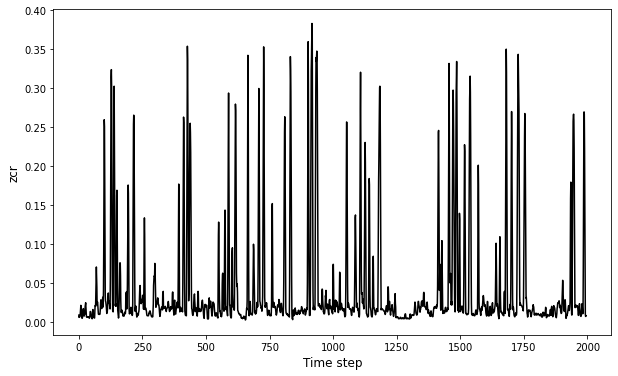

In [53]:
def timeseries(x_axis, y_axis, x_label, y_label):
    plt.figure(figsize=(10, 6))
    plt.plot(x_axis, y_axis, color='black')
    plt.xlabel(x_label, {'fontsize': 12})
    plt.ylabel(y_label, {'fontsize': 12})


timeseries(df.index, df['2.000833680700291745e-02'], 'Time step','zcr')

In [ ]:
def plot_histogram(x):
    plt.hist(x, bins = 19, alpha=0.8, color = 'gray', edgecolor = 'black')
    plt.title("Histogram of '{var_name}'".format(var_name=x.name))
    plt.xlabel("Value")
    plt.ylabel("Frequency")

plot_histogram(df['1.167152980408503460e-02'])

In [ ]:
train_size = int(len(df)*0.8)
train_dataset, test_dataset = df.iloc[:train_size], df.iloc[train_size:]

In [ ]:
def get_label_from_filename(filename):
    return basename(filename).split('.')[0]
    